## ResNet-50 Convolutional Neural Network

In [142]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split,DataLoader
import torch.optim as optim

**Data Loading - Train Set**

In [143]:
# setting file path
train_filepath = "../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train"

In [144]:
# defining transforms
train_transforms = transforms.Compose([
    transforms.ToTensor()
])

In [145]:
#Data Loading 
train_dataset = datasets.ImageFolder(train_filepath, transform=train_transforms)
print("Train Dataset Info:\n")
train_dataset

Train Dataset Info:



Dataset ImageFolder
    Number of datapoints: 87000
    Root location: ../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [146]:
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset,
                                               batch_size=100, 
                                               shuffle=True)


In [148]:
train_label = train_dataloader.dataset.classes
print("Labels :\t",train_label,"\nLength of the label list :",len(train_label))

Labels :	 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space'] 
Length of the label list : 29


### Data Visualization

In [150]:
# Capturing labels
label_list = []
for image,label in train_dataloader:
    label_list.append(label.cpu().numpy()[0])

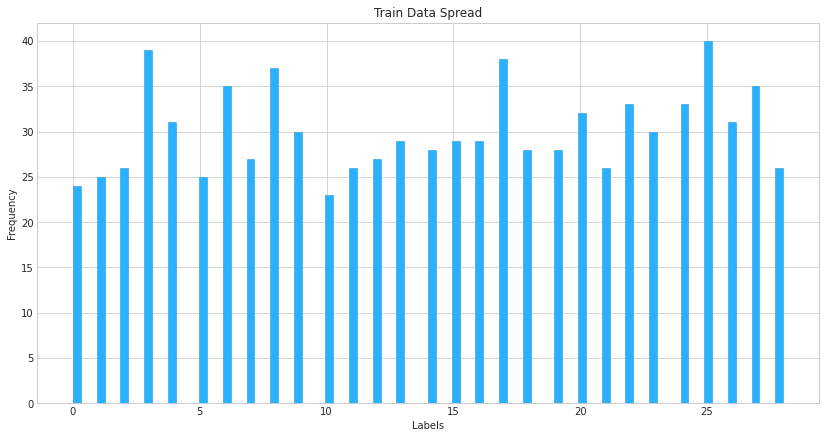

In [151]:
#plotting Histogram

plt.figure(figsize=(14,7))
plt.style.use('seaborn-whitegrid')
plt.hist(label_list, bins=90, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Train Data Spread') 
plt.xlabel('Labels') 
plt.ylabel('Frequency') 
plt.show()

In [152]:
# Checking the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

**Loading ResNet-50 Model**

In [153]:
model_resnet = torchvision.models.resnet50(pretrained=True)
model_resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [154]:
for param in model_resnet.parameters():
    param.requires_grad = False

In [155]:
in_features = model_resnet.fc.in_features
model_resnet.fc = torch.nn.Linear(in_features, 29)
model_resnet


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [156]:
!pip install torchsummary

In [157]:
from torchsummary import summary
model_resnet.to(device)
summary(model_resnet, (3, 200, 200), batch_size=100)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [100, 64, 100, 100]           9,408
       BatchNorm2d-2        [100, 64, 100, 100]             128
              ReLU-3        [100, 64, 100, 100]               0
         MaxPool2d-4          [100, 64, 50, 50]               0
            Conv2d-5          [100, 64, 50, 50]           4,096
       BatchNorm2d-6          [100, 64, 50, 50]             128
              ReLU-7          [100, 64, 50, 50]               0
            Conv2d-8          [100, 64, 50, 50]          36,864
       BatchNorm2d-9          [100, 64, 50, 50]             128
             ReLU-10          [100, 64, 50, 50]               0
           Conv2d-11         [100, 256, 50, 50]          16,384
      BatchNorm2d-12         [100, 256, 50, 50]             512
           Conv2d-13         [100, 256, 50, 50]          16,384
      BatchNorm2d-14         [100, 256,

### Model 1
#### Traing ResNet-50 CNN 

* Cost Function = CrossEntropyLoss
* Optimizer = Adam
* Learning Rate = 0.001

**Defining the Loss Function and Optimizer**

In [158]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_resnet.parameters(), lr=0.001)

Training model

In [159]:
num_epochs = 5
acc_list = []
loss_list = []
for epoch in range(num_epochs):
    correct = 0
    for data,labels in train_dataloader:
        data = data.to(device=device)
        labels = labels.to(device= device)
        data, labels = data.cuda(), labels.cuda()
        
        #forward
        scores = model_resnet(data)
        loss = criterion(scores, labels)

        #backprop
        optimizer.zero_grad()
        loss.backward()

        #gradient descent
        optimizer.step()
        
        #performance
        prediction = torch.max(scores,1)[1]
    
        correct += (prediction == labels).cpu().sum().numpy()
    acc_list.append(correct/len(train_dataloader.dataset))
    loss_list.append(loss.data)
    print("Epoch :",epoch,"\tLoss :",loss.data,"\tAccuracy :",(correct/len(train_dataloader.dataset))*100)        

Epoch : 0 	Loss : tensor(0.3626, device='cuda:0') 	Accuracy : 82.65862068965517
Epoch : 1 	Loss : tensor(0.1980, device='cuda:0') 	Accuracy : 92.97011494252874
Epoch : 2 	Loss : tensor(0.2280, device='cuda:0') 	Accuracy : 94.72528735632184
Epoch : 3 	Loss : tensor(0.1134, device='cuda:0') 	Accuracy : 95.71379310344827
Epoch : 4 	Loss : tensor(0.1259, device='cuda:0') 	Accuracy : 96.24252873563218


### Setting up Test Dataset

In [160]:
test_filepath = "../input/asl-alphabet/asl_alphabet_test/"

test_transforms = transforms.Compose([
    transforms.ToTensor()
])

test_dataset = datasets.ImageFolder(test_filepath, transform=test_transforms)
print("Test Dataset Info:\n",test_dataset)

test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset,
                                               batch_size=1,shuffle=False)

Test Dataset Info:
 Dataset ImageFolder
    Number of datapoints: 28
    Root location: ../input/asl-alphabet/asl_alphabet_test/
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [161]:
import os
test_filepath = "../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/"
labels_map = {'A':0,'B':1,'C': 2, 'D': 3, 'E':4,'F':5,'G':6, 'H': 7, 'I':8, 'J':9,'K':10,'L':11, 'M': 12, 'N': 13, 'O':14, 
                'P':15,'Q':16, 'R': 17, 'S': 18, 'T':19, 'U':20,'V':21, 'W': 22, 'X': 23, 'Y':24, 'Z':25, 
                'del': 26, 'nothing': 27,'space':28}
test_labels = []
for folder_name in os.listdir(test_filepath):
    label = folder_name.replace("_test.jpg","")
    label = labels_map[label]
    test_labels.append(np.array(label))
test_labels.sort()
    
print(test_labels)

[array(0), array(1), array(2), array(3), array(4), array(5), array(6), array(7), array(8), array(9), array(10), array(11), array(12), array(13), array(14), array(15), array(16), array(17), array(18), array(19), array(20), array(21), array(22), array(23), array(24), array(25), array(27), array(28)]


#### Testing ResNet-50 Model with CorssEntropy,Adam,LearningRate=0.001

In [205]:
with torch.no_grad():
    correct = 0
    for (images,x),labels in zip(test_dataloader,test_labels):
        model_resnet.eval()
        images = images.to(device)
#         labels = labels.to(device)
        output = model_resnet(images)
        prediction = torch.max(output,1)[1]
        correct += (prediction.cpu().numpy()[0] == labels)
    print("Accuracy of model:",(correct/len(test_dataloader.dataset))*100,"%")

Accuracy of model: 100.0 %


### Model 2
#### Traing ResNet-50 CNN 

* Cost Function = CrossEntropyLoss
* Optimizer = SGD
* Learning Rate = 0.001

**Defining the Loss Function and Optimizer**

In [163]:
criterion = torch.nn.CrossEntropyLoss()
optimizerSGD = torch.optim.SGD(model_resnet.parameters(), lr=0.001)

**Training model**

In [164]:
num_epochs = 5
acc_list = []
loss_list = []
for epoch in range(num_epochs):
    correct = 0
    for batch_idx , (data,labels) in enumerate(train_dataloader):
        data = data.to(device=device)
        labels = labels.to(device= device)
        data, labels = data.cuda(), labels.cuda()
        
        #forward
        scores = model_resnet(data)
        loss = criterion(scores, labels)

        #backprop
        optimizerSGD.zero_grad()
        loss.backward()

        #gradient descent
        optimizer.step()
        
        #performance
        prediction = torch.max(scores,1)[1]
    
        correct += (prediction == labels).cpu().sum().numpy()
    
    acc_list.append(correct/len(train_dataloader.dataset))
    loss_list.append(loss.data)
    print("Epoch :",epoch,"\tLoss :",loss.data,"\tAccuracy :",(correct/len(train_dataloader.dataset))*100)        

Epoch : 0 	Loss : tensor(0.0451, device='cuda:0') 	Accuracy : 97.3
Epoch : 1 	Loss : tensor(0.0887, device='cuda:0') 	Accuracy : 97.55057471264368
Epoch : 2 	Loss : tensor(0.0815, device='cuda:0') 	Accuracy : 97.78620689655172
Epoch : 3 	Loss : tensor(0.0468, device='cuda:0') 	Accuracy : 98.0632183908046
Epoch : 4 	Loss : tensor(0.0581, device='cuda:0') 	Accuracy : 98.2264367816092


**Plotting Accuracy and Loss while training**


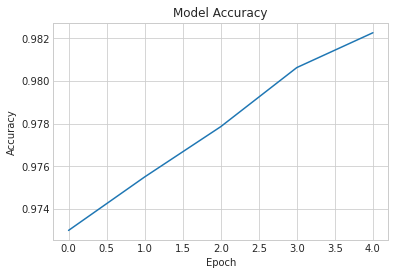

In [212]:
plt.plot(acc_list)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

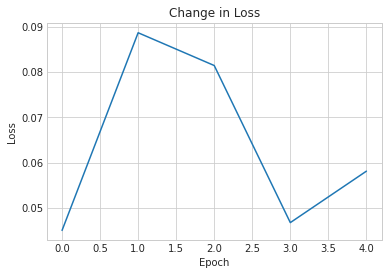

In [206]:
loss_val_list=[]
for i in range(len(loss_list)):
    loss_val_list.append(loss_list[i].cpu().detach().numpy())
    
plt.plot(loss_val_list)
plt.title('Change in Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#### Testing ResNet-50 Model with CorssEntropy,SGD,LearningRate=0.001

In [204]:
with torch.no_grad():
    correct = 0
    pred_list =[]
    for (images,x),labels in zip(test_dataloader,test_labels):
        model_resnet.eval()
        images = images.to(device)
#         labels = labels.to(device)
        output = model_resnet(images)
        prediction = torch.max(output,1)[1]
        pred_list.append(prediction.cpu().numpy()[0])
        correct += (prediction.cpu().numpy()[0] == labels)
    print("Accuracy of model:",(correct/len(test_dataloader.dataset))*100,"%")

Accuracy of model: 100.0 %
